# Keras CNN MNIST 

## CNN v.s. MLP

CNN 和 MLP 最大的不同點在於多了 **卷積層** 和 **池化層** 來做影像提取特徵的工作

而這部分稱之為卷積運算

以下用例子來做實際說明

## <font color='blue'>資料預處理(Process)</font>

### step 1. 匯入所需模組

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


### step3. 讀取 mnist 資料

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

### step3. 將 features 轉換為 4 維矩陣

將原本的資料 60000*28*28 轉換為 60000*28*28*1，之所以是 *1 因為影像的顏色為單色

In [3]:
print('x_train shape: ',x_train.shape)
print('x_test shape:  ',x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:   (10000, 28, 28)


In [4]:
x_train_4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test_4D  = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### step4. 將 features 進行標準化

In [5]:
x_train_4D_normalize = x_train_4D / 255
x_test_4D_normalize  = x_test_4D  / 255

### step5. 將 label 值進行 Onehot encoding 轉換

In [6]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot  = np_utils.to_categorical(y_test)

## <font color='blue'>建立模型</font>

### step1. 匯入建立模型所需模組

In [7]:
from keras.models import  Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

### step2. 建立 keras 的 Sequential 模型

建立 Sequential 線性堆疊模型，之後只要用 model.add 慢慢堆下去

In [8]:
model = Sequential()

### step3. 建立 卷積層1 和 池化層1

建立卷積層1 ， 加入 Conv2D 層至模型中

In [9]:
model.add(Conv2D(filters=16,                # 建立 16 種濾鏡(filter weight) ， 所以能產生 16 個影像
                 kernel_size=(5,5),         # 每個濾鏡的大小為 5*5 
                 padding='same',            # 此設定方式是為了讓經過 卷積運算 的影像大小不變，維持 28*28
                 input_shape = (28,28,1),   # 加入我們的輸入層，我們每張影像的維度為 28*28*1 (長、寬、單色)
                 activation = 'relu'))      # 使用 relu 這激活函式

建立池化層1 , 加入 MaxPooling2D 模型

In [10]:
model.add(MaxPool2D(pool_size=(2,2)))

#### 甚麼是 Maxpooling ?

Max pooling 是一種將影像縮減取樣的方式之一，它的操作方式很簡單，以下圖為例子，現在我們有個 4 * 4 的矩陣，我們設定 pool szie 為 2 * 2，因此所有的矩陣都被區分為 4 大色塊，每個色塊中我們取最大的那個數值作為我們轉換後的值，因此原本 4 * 4 大小的矩陣，就被我們縮成 2 * 2 了

![maxpooling](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

Max pooling 的用意為合?

<ol>
    <li>減少需要處理的資料點，節省後續的運算時間</li>
    <li>讓影像位置差異性降低，例如: 手寫數字7，在 28 * 28 的格紙中，數字的位置可能不固定，但是位置的不同不應該影響我們數字的判讀，於是用 Max pooling 的方式降低位置偏移所造成的誤差</li>
    <li>參數的數量及計算量降低，一定程度上控制 overfitting 的狀況發生
</ol>



### step4. 建立 卷積層2 和 池化層2

建立卷積層2 ， 加入 Conv2D 層至模型中

In [11]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding ='same',
                 activation='relu'))

建立池化層1 , 加入 MaxPooling2D 模型

In [12]:
model.add(MaxPool2D(pool_size=(2,2)))

建立 Dropout 避免 overfitting 的狀況發生

In [13]:
model.add(Dropout(0.25))

### step5. 建立神經網路(平坦層、隱藏層、輸出層)

加入 平坦層 ，將上一步的池化層 7 * 7 * 36 轉換為 1 維陣列， 也就是 1764 個神經元

In [14]:
model.add(Flatten())

建立隱藏層，共有 128 個神經元

In [15]:
model.add(Dense(128, activation='relu'))

使用 Dropout 來避免 overfitng 的狀況產生

In [16]:
model.add(Dropout(0.5))

最後建立輸出層，共 0 ~ 9 十個數字，也就是十個神經元

In [17]:
model.add(Dense(10,activation='softmax'))

#### step6. 查看模型摘要

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## <font color='blue'>進行訓練</font>

### step1. 定義訓練方式

In [19]:
model.compile(loss = 'categorical_crossentropy', # 設定我們的 loss function，在 deep learning 使用 cross entropy 效果比較好
              optimizer = 'adam',                # 設定訓練時的優化方法，使用 adam 優化能夠使訓練更快收斂，提高準確率
              metrics = ['accuracy'])            # 評估模型的方式為 accuracy 來做評斷

### step2. 開始訓練

In [20]:
train_history = model.fit(x = x_train_4D_normalize,
                          y = y_train_onehot,
                          validation_split = 0.2,   # 設定 訓練 與 驗證 資料的比例，這邊設 0.2，代表是 8(train):2(validation)
                          epochs = 10,              # 設定 10 次的訓練週期
                          batch_size = 300,         # 每一批次為 300 筆資料
                          verbose = 2)              # 設定顯示訓練過程的方式 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.4897 - acc: 0.8477 - val_loss: 0.0962 - val_acc: 0.9723
Epoch 2/10
 - 5s - loss: 0.1405 - acc: 0.9589 - val_loss: 0.0639 - val_acc: 0.9809
Epoch 3/10
 - 5s - loss: 0.1028 - acc: 0.9689 - val_loss: 0.0511 - val_acc: 0.9841
Epoch 4/10
 - 6s - loss: 0.0834 - acc: 0.9752 - val_loss: 0.0463 - val_acc: 0.9857
Epoch 5/10
 - 6s - loss: 0.0716 - acc: 0.9777 - val_loss: 0.0399 - val_acc: 0.9884
Epoch 6/10
 - 6s - loss: 0.0644 - acc: 0.9808 - val_loss: 0.0391 - val_acc: 0.9886
Epoch 7/10
 - 6s - loss: 0.0566 - acc: 0.9825 - val_loss: 0.0436 - val_acc: 0.9877
Epoch 8/10
 - 5s - loss: 0.0511 - acc: 0.9844 - val_loss: 0.0344 - val_acc: 0.9895
Epoch 9/10
 - 5s - loss: 0.0454 - acc: 0.9863 - val_loss: 0.0338 - val_acc: 0.9901
Epoch 10/10
 - 6s - loss: 0.0429 - acc: 0.9866 - val_loss: 0.0342 - val_acc: 0.9901


### step3. 畫出 accuracy 執行結果

In [21]:
import matplotlib.pyplot as plt 

# train_history 為訓練過程所產生的資料
# train 為 80%訓練用的資料的執行結果， validation 為20%用來驗證的資料的執行結果
def show_train_history(train_history, train, validation):       
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

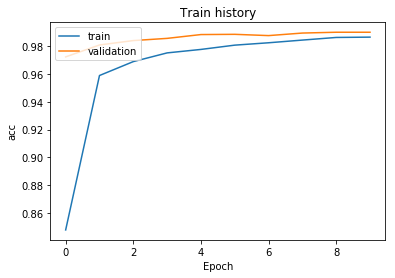

In [22]:
show_train_history(train_history, 'acc', 'val_acc')

### step4. 顯示 loss 誤差執行結果

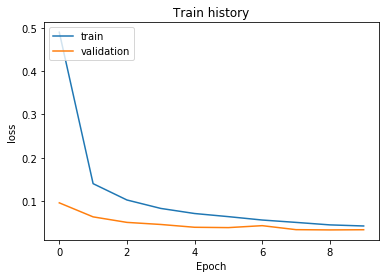

In [23]:
show_train_history(train_history,'loss','val_loss')

## <font color='blue'>評估模型準確率</font>

In [24]:
scores = model.evaluate(x_test_4D_normalize, y_test_onehot)
print(scores)

10000/10000 [==============================] - 1s 102us/step
[0.025764458023345652, 0.9906]


## <font color='blue'>進行預測</font>

model.predict_classes 預測的是類別 ， model.predict 預測的是數值

In [25]:
prediction = model.predict_classes(x_test_4D_normalize)

In [26]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

#### 顯示前十筆預測結果

In [27]:
import matplotlib.pyplot as plt


def shoe_multiple_image(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    
    # 大於25張只秀出 25 張
    if num>25:
        num =25
    
    for i in range(num):
        ax = plt.subplot(5,5, 1+i)            # 建立 subgraph 子圖形為5行5列
        ax.imshow(images[idx], cmap='binary') # 劃出 subgraph 子圖形
        
        title = "label=" + str(labels[idx])   # 設定 子圖形 title
        if len(prediction)>0:                 # 若有預測值，再加入子圖形 title
            title+=",predict =" + str(prediction[idx])
        
        ax.set_title(title, fontsize=10)      # 把 title 加上去
        ax.set_xticks([])                     # 設定不顯示刻度
        ax.set_yticks([])                     # 設定不顯示刻度
        
        idx+=1                                # 讀取下一筆
        
    plt.show()

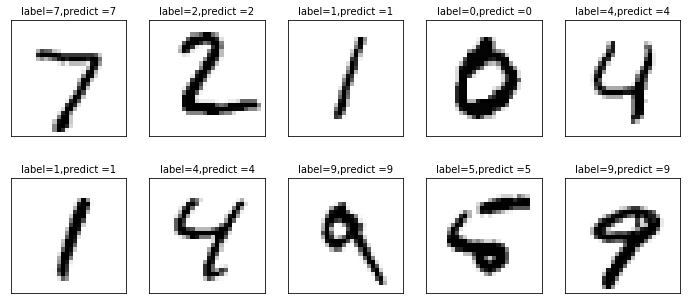

In [28]:
shoe_multiple_image(x_test, y_test, prediction, idx=0, num=10)

## <font color='blue'>顯示 confusion matrix</font>

In [29]:
import pandas as pd 
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,3,1024,0,1,0,0,2,0,0
3,0,0,1,1002,0,3,0,2,2,0
4,0,0,0,0,978,0,1,0,1,2
5,1,0,0,4,0,884,2,0,0,1
6,5,2,0,0,2,1,948,0,0,0
7,0,2,2,0,0,0,0,1021,1,2
8,3,1,3,2,1,2,0,2,955,5


<ul>
    <li>對角線為符合的數字</li>
    <li>非對角線為不符合的數字</li>
</ul>